# T 분포 기반 검정(t-test)
- 검정 통계량 T 분포 이용
- 단일표본T검정,대응표본T검정,독립표본T검정
  - 단일표본T검정(One Sample T-Test) => 단일 모집단에서 수치형 변수값의 평균을 예상한 값과 비교하는 검정
    - 가정 : 정규성(모집단의 샘플들이 정규분포를 이룬다고 가정)
      - 표본의 크기가 30보다 크면 보통 중심극한정리에 따라 표본분포가 정규분포를 따른다고 보고 특별히 정규성 검정 안하고 T검정 수행
      - 필요하다면 샤피로-윌크검정, K-S검정, Q-Q Plot을 이용하여 정규성 검정을 먼저 수행
        - 정규분포를 따르는 가정 만족하면 t.test 수행
        - 정규분포를 따르는 가정 불만족하면 wilcox.test 수행
    - 예 : 30대 남성의 평균 키 크기
      - 귀무가설 : 평균은 예상한(설정한) 기준값이다.
      - 대립가설 : 평균은 예상한(설정한) 기준값이 아니다.
  - 대응표본T검정(Matched-Paired Sample T-Test) => 단일 모집단에서 두번의 처리를 가한 전후의 수치형 변수값의 평균을 비교하는 검정
    - 동일한 응답자의 사전,사후 차이(효과) 분석 목적
    - 예 : 운동 전후 평균 악력 비교
      - 귀무가설 : 변수 A와 변수 B의 평균에는 차이가 없다.
      - 대립가설 : 변수 A와 변수 B의 평균에는 차이가 있다.
  - 독립표본T검정(Independent Sample T-Test) => 2개의 독립된 모집단의 평균을 비교하는 검정
    - 가정 : 두 모집단의 등분산성 만족 여부 확인 필수
    - 독립변수 : 질적 변수 1개(속성 2개)
    - 종속변수 : 양적 변수 1개
    - 예 : 남녀별 평균 출근준비시간 비교
      - 귀무가설 : 두 집단의 평균에는 차이가 없다.
      - 대립가설 : 두 집단의 평균에는 차이가 있다.

# 가설검정 절차
- 귀무가설,대립가설 설정 => 유의수준 설정 => 검정통계량 계산 => 귀무가설 기각/채택 여부 결정
- 양측검정, 단측검정 차이 이해 필수
  

In [19]:
# T 검정 예제

###########################################################################################
# 단일 표본 T 검정
##########################################################################################
library(MASS)

# 고양이 데이터 샘플 이용
# sex => 성별
# Bwt => 몸무게
# Hwt => 심장 무게
str(cats)

# 'data.frame':	144 obs. of  3 variables:
#  $ Sex: Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
#  $ Bwt: num  2 2 2 2.1 2.1 2.1 2.1 2.1 2.1 2.1 ...
#  $ Hwt: num  7 7.4 9.5 7.2 7.3 7.6 8.1 8.2 8.3 8.5 ...

# 정규성 검정 수행, p-value가 0.05보다 작으므로, 표본분포가 정규분포를 따른다는 귀무가설 기각
shapiro.test(cats$Bwt)

# 윌콕스 테스트
# 평균(2.6)과 같은지 비교하므로 양측검정(two.sided)
# p-value가 0.05보다 작으므로, 귀무가설 기각(즉 고양이 모집단의 평균 몸무게가 2.6이라고 할수 없다.)
# two.sided 아닌 단측검정시 greater, less 사용
wilcox.test(cats$Bwt, mu = 2.6, alternative = "two.sided")

# 만약 정규성 검정 수행시 귀무가설을 기각못하면 t.test 사용
t.test(cats$Bwt, mu = 2.6, alternative="two.sided")

###########################################################################################
# 대응 표본 T 검정
##########################################################################################

# 귀무가설 : 두 개의 모평균 간에는 차이가 없다.
# 대립가설 : 두 개의 모평균 간에는 차이가 있다.
# 대응 표본은 반드시 paired=TRUE로 해야함(디폴트는 FALSE)

data.before <- c(7,3,4,5,2,1,6)
data.after <-  c(8,4,5,6,2,3,7)

# p-value가 유의수준 0.05보다 작으므로 귀무가설 기각
t.test(data.before, data.after, alternative="two.sided", paired = TRUE)

###########################################################################################
# 독립 표본 T 검정
##########################################################################################
# 등분산성 검정 수행
# p-value가 유의수준 0.05보다 작으므로 귀무가설 기각
# 즉 등분산성이 만족 안됨
var.test(Bwt ~ Sex, data = cats)

# 독립 표본 T 검정시에 등분산성이 만족 안됨(var.equal=FALSE)로 세팅하고 수행
# 귀무가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 없다.
# 대립가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 있다.
# p-value가 유의수준 0.05보다 작으므로 귀무가설 기각 => 차이 있다고 볼수 있음
t.test(Bwt ~ Sex, data = cats, alternative = "two.sided", var.equal=FALSE)


'data.frame':	144 obs. of  3 variables:
 $ Sex: Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Bwt: num  2 2 2 2.1 2.1 2.1 2.1 2.1 2.1 2.1 ...
 $ Hwt: num  7 7.4 9.5 7.2 7.3 7.6 8.1 8.2 8.3 8.5 ...



	Shapiro-Wilk normality test

data:  cats$Bwt
W = 0.95188, p-value = 6.731e-05



	Wilcoxon signed rank test with continuity correction

data:  cats$Bwt
V = 5607, p-value = 0.02532
alternative hypothesis: true location is not equal to 2.6



	One Sample t-test

data:  cats$Bwt
t = 3.0565, df = 143, p-value = 0.002673
alternative hypothesis: true mean is not equal to 2.6
95 percent confidence interval:
 2.643669 2.803553
sample estimates:
mean of x 
 2.723611 



	Paired t-test

data:  data.before and data.after
t = -4.5826, df = 6, p-value = 0.00376
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.5339599 -0.4660401
sample estimates:
mean of the differences 
                     -1 



	F test to compare two variances

data:  Bwt by Sex
F = 0.3435, num df = 46, denom df = 96, p-value = 0.0001157
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2126277 0.5803475
sample estimates:
ratio of variances 
         0.3435015 



	Welch Two Sample t-test

data:  Bwt by Sex
t = -8.7095, df = 136.84, p-value = 8.831e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6631268 -0.4177242
sample estimates:
mean in group F mean in group M 
       2.359574        2.900000 


# 분산분석(ANOVA)
- 일원배치 분산분석, 이원배치 분산분석
- 검정통계량 F 분포 이용

## 일원배치 분산분석(one-way ANOVA)
- 독립변수 : 질적 변수 1개(범주가 3개 이상)
  - 연령대별(20대, 30대, 40대 등)
- 종속변수 : 양적 변수 1개
- 귀무가설 : K개 집단간 모평균에는 차이가 없다.
- 대립가설 : K개 집단간 모평균이 모두 같다고 할 수 없다.(적어도 1개이상의 집단의 모평균이 차이가 있다.)
- 사후검정 Tukey HSD : 검정 결과 귀무가설이 기각된 경우, 구체적으로 어떤 집단간의 차이가 존재하는지 알아보기 위한 검정 수행

## 이원배치 분산분석(two-way ANOVA)
- 독립변수 : 질적 변수 2개(변수별로 범주가 2개 이상)
  - 연령대별(20대, 30대, 40대 등)
- 종속변수 : 양적 변수 1개

## 다원배치 분산분석(multi-way ANOVA)
- 독립변수 : 질적 변수 3개 이상
- 종속변수 : 양적 변수 1개

## 다변량 분산분석(MANOVA)


In [20]:
###################################################################################
#                     2. 통계분석 (사용 데이터 : bike_marketing)               
###################################################################################
#---------------------------------------------------------------------------------
# Q1) pop_density 변수를 factor형 변수로 변환하고, 
#     pop_density별 revenues의 평균 차이가 있는지 통계분석을 시행하여 결과를 해석하시오. 
#     만일 대립가설이 채택된다면 사후분석을 실시하고 결과를 해석하시오.
#---------------------------------------------------------------------------------

# 3개 이상 범주형 변수 1개에 대한 평균 차이 검정 => 일원 배치 분산분석(F 검정 통계량) - one way ANOVA => 귀무가설 기각시 사후검정 tukey HSD 수행

df = read.csv('./data/bike_marketing.csv', stringsAsFactors = T)

head(df)

# 범주별 데이터 카운트
table(df$pop_density)

# 귀무가설 : pop_density별 revenues 차이가 없다.
# 대립가설 : pop_density별 revenues 차이가 있다.
anova <- aov(formula = revenues ~ pop_density, data = df)

# 유의수준 5% 하에서 p-value가 유의수준보다 크기 때문에 귀무가설을 기각할수 없다.
# 즉, pop_density별 revenues의 평균 차이가 있다고 볼 수 없다.
summary(anova)



,company_num,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,1,65.66,47.86,52.46,166,39.26,5,High
2,2,39.10,55.20,77.40,172,38.90,7,Medium
3,3,174.81,52.01,68.01,295,49.51,11,Medium
4,4,34.36,61.96,86.86,183,40.56,7,High
5,5,78.21,40.91,30.41,150,40.21,9,Low
6,6,34.19,15.09,12.79,62,38.09,3,High



  High    Low Medium 
    52     68     52 

             Df Sum Sq Mean Sq F value Pr(>F)
pop_density   2     42   20.87    0.61  0.545
Residuals   169   5781   34.21               

In [21]:
## iris, 붓꽃 데이터 기반 일원배치분산분석 수행

data(iris)

str(iris)

result <- aov(Sepal.Width ~ Species, data = iris)
summary(result) # 유의수준 0.05보다 p-value값(2e-16)이 매우 작으므로 귀무가설 기각

# 사후검정 수행(Tukey HSD)
# 2개 집단씩 짝을지어 비교 수행
# 귀무가설 : 집단들 사이의 평균은 같다.
# 대립가설 : 집단들 사이의 평균은 같지 않다.
# p adj(p-value)값이 유의수준 0.05보다 작으므로 모든 비교에 대해서 평균의 유의미한 차이가 있다.
# versicolor-setosa diff가 가장 크므로, 통계적으로 가장 큰 유의미한 차이를 갖는다.
TukeyHSD(aov(Sepal.Width ~ Species, data = iris))

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


# 교차분석
- 질적 변수간의 관계 확인 목적
- 카이제곱분포 기반, 동질성검정,독립성검정,적합성검정
  - 귀무가설 : 두 변수간의 관련이 없다.(독립이다.)
  - 대립가설 : 두 변수간의 관련이 있다.(독립이아니다.)

## 적합성 검정
- 실험에서 얻은 관측값들이 예상한 이론과 일치하는지 아닌지 검정
  - 관찰도수, 기대도수를 이용
- 예 : 응답자의 주로 사용하는 손에 대한 여론 조사시, 오른손이 80%, 왼손이 20%라고 예상하는데 실제 데이터도 그러한지 검정
- 귀무가설 : 실제 분포와 이론 분포간에는 차이가 없다.(두 분포는 일치)
- 대립가설 : 실제 분포와 이론 분포간에는 차이가 있다.(두 분포는 불일치)

## 독립성 검정
- 모집단이 두개의 변수 A, B로 범주화되었을때, A와 B 사이의 관계가 독립인지 아닌지 검정
- 예 : 주로 사용하는 손(왼손, 오른손)과 운동 빈도의 관계 검정

## 동질성 검정
- 모집단이 임의의 변수에 따라 R개의 속성으로 범주화 되었을때, R개의 부분 모집단에서 추출한 각 표본인 C개의 범주화된 집단의 분포가 서로 동일한지 검정
- 모집단 내에서 특정 변수 1개에 대해 범주화된 해당 속성별로 추출한 부분 모집단이 서로 일치하는지 검정
  - 그냥 독립성 검정과 같은 방식으로 한다고 생각하면 됨
- 귀무가설 : 부분 모집단은 모두 동일하다.
- 대립가설 : 부분 모집단은 적어도 1개 이상의 모집단은 다른 값이 존재한다.


In [22]:

# 적합성 검정

data(survey, package = "MASS")
str(survey)

# 귀무가설 : 응답자 중 왼손잡이 비율이20 %, 오른손잡이 비율이 80 %이다.
# 대립가설 : 응답자 중 왼손잡이 비율이20 %, 오른손잡이 비율이 80 %라고 할 수 없다.

# 분할표 확인, 범주형 변수에 대해 왼손잡이 18, 오른손잡이 218
table(survey$W.Hnd)

data <- table(survey$W.Hnd)

# 카이제곱 적합도 검정 수행
# 유의 확률이 유의수준보다 작으므로 귀무가설 기각
chisq.test(data, p=c(0.2, 0.8))

# 독립성 검정

# 귀무가설 : 주로 사용하는 손과 운동빈도는 독립이다.
# 대립가설 : 주로 사용하는 손과 운동빈도는 독립이 아니다.

## 분할표 생성
table(survey$W.Hnd, survey$Exer)

# p-value가 유의수준보다 크기 때문에 귀무가설을 기각할수 없다. 
# 즉, 주로 사용하는 손과 운동 빈도는 서로 독립이라고 말할 수 있다.
chisq.test(table(survey$W.Hnd, survey$Exer))


'data.frame':	237 obs. of  12 variables:
 $ Sex   : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 1 2 1 2 2 ...
 $ Wr.Hnd: num  18.5 19.5 18 18.8 20 18 17.7 17 20 18.5 ...
 $ NW.Hnd: num  18 20.5 13.3 18.9 20 17.7 17.7 17.3 19.5 18.5 ...
 $ W.Hnd : Factor w/ 2 levels "Left","Right": 2 1 2 2 2 2 2 2 2 2 ...
 $ Fold  : Factor w/ 3 levels "L on R","Neither",..: 3 3 1 3 2 1 1 3 3 3 ...
 $ Pulse : int  92 104 87 NA 35 64 83 74 72 90 ...
 $ Clap  : Factor w/ 3 levels "Left","Neither",..: 1 1 2 2 3 3 3 3 3 3 ...
 $ Exer  : Factor w/ 3 levels "Freq","None",..: 3 2 2 2 3 3 1 1 3 3 ...
 $ Smoke : Factor w/ 4 levels "Heavy","Never",..: 2 4 3 2 2 2 2 2 2 2 ...
 $ Height: num  173 178 NA 160 165 ...
 $ M.I   : Factor w/ 2 levels "Imperial","Metric": 2 1 NA 2 2 1 1 2 2 2 ...
 $ Age   : num  18.2 17.6 16.9 20.3 23.7 ...



 Left Right 
   18   218 


	Chi-squared test for given probabilities

data:  data
X-squared = 22.581, df = 1, p-value = 2.015e-06


       
        Freq None Some
  Left     7    3    8
  Right  107   21   90

Warning message in chisq.test(table(survey$W.Hnd, survey$Exer)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(survey$W.Hnd, survey$Exer)
X-squared = 1.2065, df = 2, p-value = 0.547


# 상관분석(corelation analysis)
- 두 변수간의 관계의 정도를 알아보기 위한 방법
  - 공분산, 상관계수
- 공분산 => 2개 확률변수의 선형 관계를 나타내는 값, 음의 무한대~양의 무한대 값 가능
  - `COV(X, Y) = E[(X - E(X))(Y - E(Y))]`
- 상관계수 => 두 변수 사이의 상관 관계를 나타내는 값 [-1,1] 값 가능
  - 피어슨 상관계수(보통 상관계수라고 하면 이걸 의미), 스피어만 상관계수

# 회귀분석(regression analysis)
- 독립변수에 따른 종속변수의 변화를 분석하는 기법
  - 독립변수, 종속변수 모두 수치형 변수
- 단순회귀분석,다중회귀분석(다중공선성주의, 분산팽창요인 10 이상 확인),릿지회귀,라쏘회귀,엘라스틱넷
- 회귀분석 가정(아래 가정이 만족되어야 회귀분석이 의미 있음)
  - 독립/ 종속변수 선형성 확인 => 공분산, 산점도
  - 오차의 등분산성 => 독립변수에 따른 잔차 그래프
  - 오차의 독립성 => 오차간 관계없음, 더빈-왓슨 검정
  - 오차의 정규성 => QQ plot, KS 검정, shapro-wilk 검정
- 회귀분석 검토
  - 회귀계수 유의성 검정(T 검정통계량)
  - 모형 설명력 확인(결정계수, 수정결정계수)
  - 회귀모형 통계적 유의성 검정(F 검정통계량)
  - 다중회귀분석의 경우 다중공선성 확인 및 VIF(분산팽창요인) 10 이상 여부 확인
    - 분산팽창요인이 10 이상이면, 독립변수간 상관관계가 높다고 볼 수 있고, 모형의 설명력을 떨어뜨려 신뢰가 낮아지게됨
    - 보통 변수를 일부 선택하는 방식 등으로 해결


In [23]:
#----------------------------------------------------------------------------------------
# Q2) google_adwords, facebook, twitter, marketing_total, employees가 
#     revenues에 영향을 미치는지 알아보는 회귀분석을 전진선택법을 사용하여 수행하고 결과를 해석하시오.
#----------------------------------------------------------------------------------------
# R을 이용하면 step 함수를 이용해서 쉽게 해결 가능하지만, python에서는 sklearn에 이러한 stepwise variable selection 관련 빌트인 함수가 없음
# 회귀분석은 R을 이용해서 수행하는 것이 나을 것으로 생각됨

#sessionInfo()

df <- read.csv(file = './data/bike_marketing.csv')
head(df)

# 틸드(~) 왼쪽이 종속변수(예측 대상 변수)이고 오른쪽이 독립변수로, 모든 독립변수를 의미하는 거면 마침표(.)를 대신 사용해도 됨
model <- lm(
    formula = revenues ~ google_adwords + facebook + twitter + marketing_total + employees
    , data = df
)

# 다중선형회귀를 했을때, summary로 확인해보면 됨
summary(model)

# 변수선택법은 전진선택법, 후진제거법, 단계적 선택법 총  3가지
# 각각 forward, backward, both 로 구분

# 전진선택법
# 변수를 하나씩 추가하면서 AIC값이 낮아질수록 더 좋은 성능의 모델(모형)
# 선택된 변수 google_adwords + facebook + twitter + marketing_total + employees
# 추정된 회귀식 revenues = 28.44 + 1.21 * google_adwords + 1.35 * facebook + 1.17 * twitter + -1.17 * marketing_total + 0.39 * employees
print("전진선택법==========================================")
step(model, direction = "forward")

print("후진제거법==========================================")
step(model, direction = "backward")

print("단계적선택법==========================================")
step(model, direction = "both")




,company_num,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1,65.66,47.86,52.46,166,39.26,5,High
2,2,39.10,55.20,77.40,172,38.90,7,Medium
3,3,174.81,52.01,68.01,295,49.51,11,Medium
4,4,34.36,61.96,86.86,183,40.56,7,High
5,5,78.21,40.91,30.41,150,40.21,9,Low
6,6,34.19,15.09,12.79,62,38.09,3,High



Call:
lm(formula = revenues ~ google_adwords + facebook + twitter + 
    marketing_total + employees, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7788 -1.2437  0.2024  1.4643  4.2835 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      28.4433     0.5962  47.706  < 2e-16 ***
google_adwords    1.2110     0.5708   2.122 0.035348 *  
facebook          1.3464     0.5714   2.356 0.019618 *  
twitter           1.1724     0.5713   2.052 0.041711 *  
marketing_total  -1.1696     0.5708  -2.049 0.042033 *  
employees         0.3865     0.1042   3.708 0.000284 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.108 on 166 degrees of freedom
Multiple R-squared:  0.8733,	Adjusted R-squared:  0.8695 
F-statistic: 228.9 on 5 and 166 DF,  p-value: < 2.2e-16


[1] "전진선택법=========================================="
Start:  AIC=262.4
revenues ~ google_adwords + facebook + twitter + marketing_total + 
    employees




Call:
lm(formula = revenues ~ google_adwords + facebook + twitter + 
    marketing_total + employees, data = df)

Coefficients:
    (Intercept)   google_adwords         facebook          twitter  
        28.4433           1.2110           1.3464           1.1724  
marketing_total        employees  
        -1.1696           0.3865  


[1] "후진제거법=========================================="
Start:  AIC=262.4
revenues ~ google_adwords + facebook + twitter + marketing_total + 
    employees

                  Df Sum of Sq    RSS    AIC
<none>                         737.54 262.40
- marketing_total  1    18.654 756.19 264.70
- twitter          1    18.713 756.25 264.71
- google_adwords   1    20.000 757.54 265.00
- facebook         1    24.671 762.21 266.06
- employees        1    61.102 798.64 274.09



Call:
lm(formula = revenues ~ google_adwords + facebook + twitter + 
    marketing_total + employees, data = df)

Coefficients:
    (Intercept)   google_adwords         facebook          twitter  
        28.4433           1.2110           1.3464           1.1724  
marketing_total        employees  
        -1.1696           0.3865  


[1] "단계적선택법=========================================="
Start:  AIC=262.4
revenues ~ google_adwords + facebook + twitter + marketing_total + 
    employees

                  Df Sum of Sq    RSS    AIC
<none>                         737.54 262.40
- marketing_total  1    18.654 756.19 264.70
- twitter          1    18.713 756.25 264.71
- google_adwords   1    20.000 757.54 265.00
- facebook         1    24.671 762.21 266.06
- employees        1    61.102 798.64 274.09



Call:
lm(formula = revenues ~ google_adwords + facebook + twitter + 
    marketing_total + employees, data = df)

Coefficients:
    (Intercept)   google_adwords         facebook          twitter  
        28.4433           1.2110           1.3464           1.1724  
marketing_total        employees  
        -1.1696           0.3865  


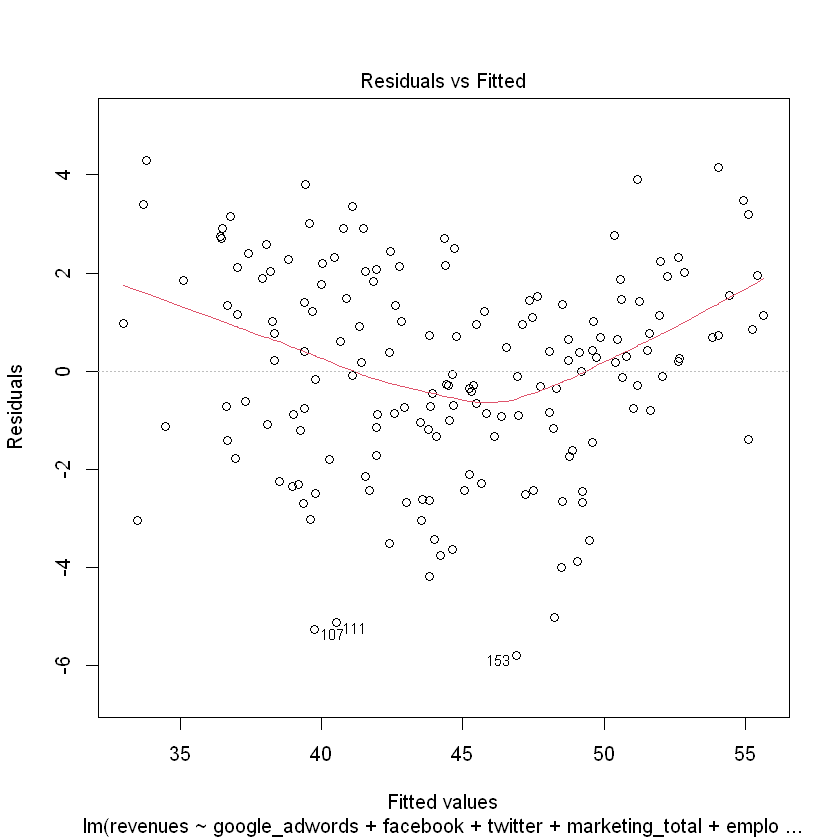

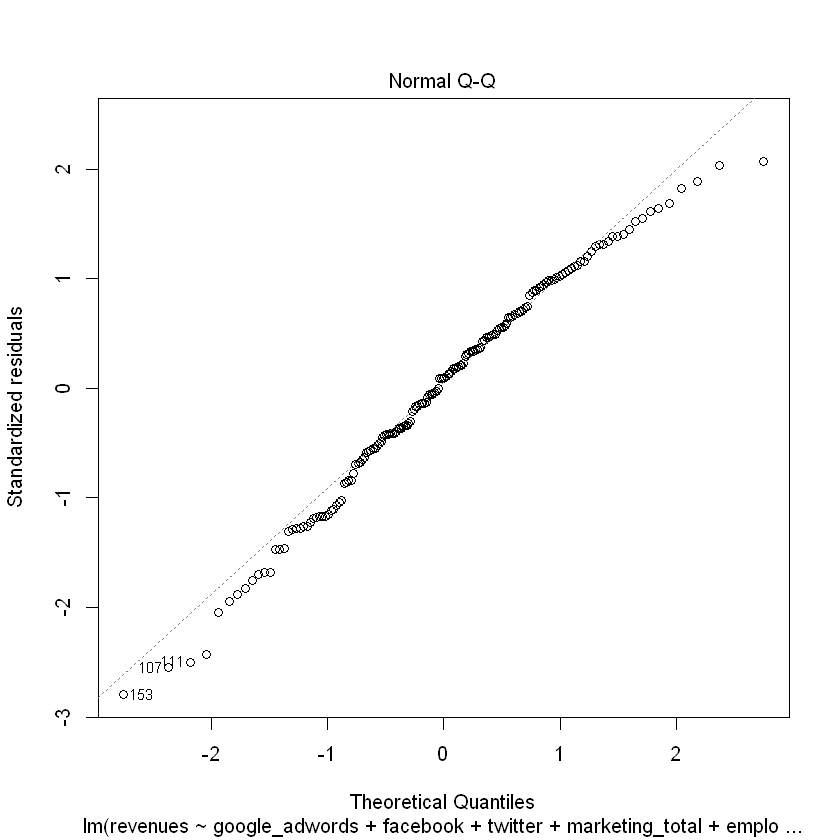

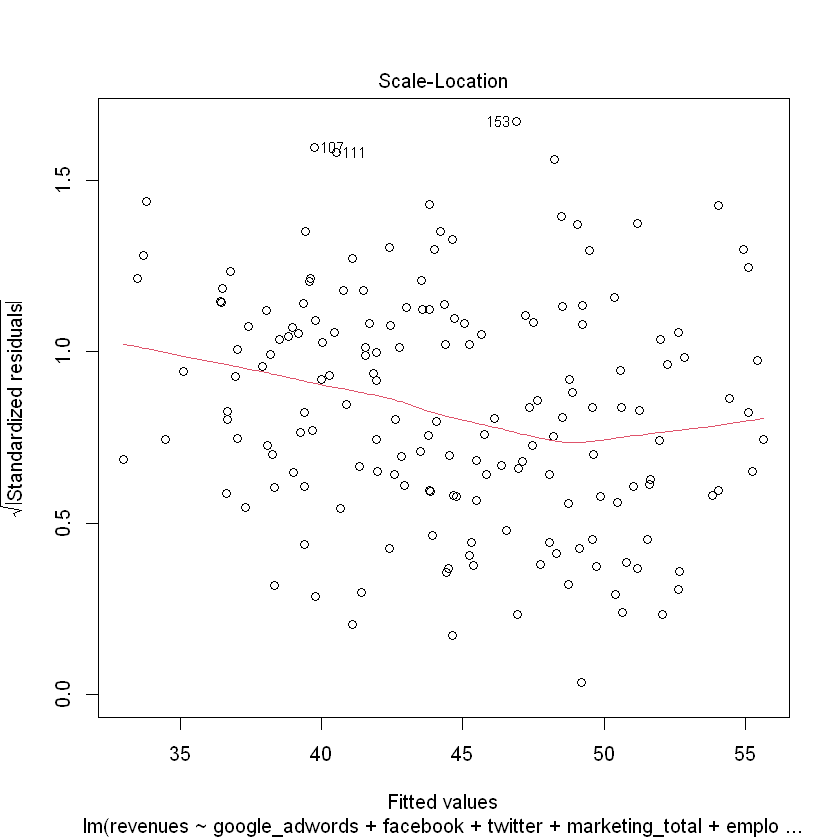

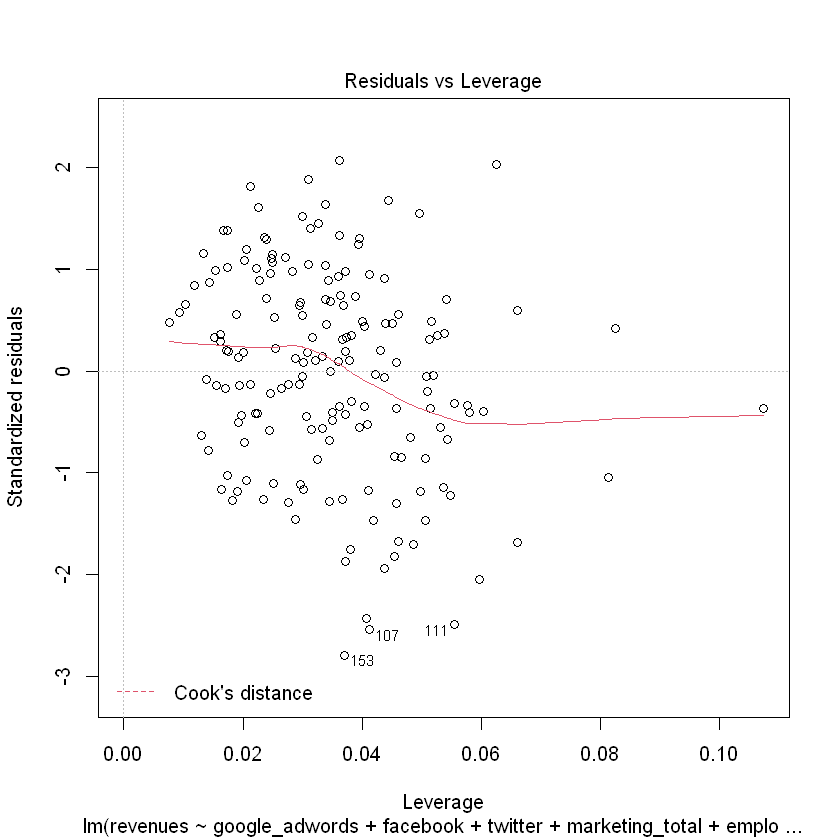

In [24]:
#---------------------------------------------------------------------------
# Q3) 전진선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 
#     잔차분석을 수행하고 결과를 해석하시오. 
#---------------------------------------------------------------------------
# 잔차분석 => 회귀 모형에 대한 가정이 충족되는지 검정하는 것(잔차의 등분산성, 독립성, 정규성 확인)
# R plot 함수를 이용하여 잔차 분석 수행 가능
# 첫번째 => 잔차의 등분산성 확인 가능 관측값에 따른 잔차(관측 - 예측) 그래프 => 직선에 가까울수록 좋음
# 두번째 => QQ plot => 잔차의 정규성 확인 가능 => y=x에가까울수록 정규분포를 따름
# 세번째 => 첫번째 그래프와 동일한 의미
# 네번째 => 설명변수가 극단값에 있을수록 레버리지(x축)은 큰 값을 갖게 됨
plot(model)


      GRE            TOEFL        Univ_Rating         SOP           LOR       
 Min.   :290.0   Min.   : 92.0   Min.   :1.000   Min.   :1.0   Min.   :1.000  
 1st Qu.:308.0   1st Qu.:103.0   1st Qu.:2.000   1st Qu.:2.5   1st Qu.:3.000  
 Median :317.0   Median :107.0   Median :3.000   Median :3.5   Median :3.500  
 Mean   :316.8   Mean   :107.4   Mean   :3.087   Mean   :3.4   Mean   :3.453  
 3rd Qu.:325.0   3rd Qu.:112.0   3rd Qu.:4.000   3rd Qu.:4.0   3rd Qu.:4.000  
 Max.   :340.0   Max.   :120.0   Max.   :5.000   Max.   :5.0   Max.   :5.000  
      CGPA          Research      Chance_of_Admit 
 Min.   :6.800   Min.   :0.0000   Min.   :0.3400  
 1st Qu.:8.170   1st Qu.:0.0000   1st Qu.:0.6400  
 Median :8.610   Median :1.0000   Median :0.7300  
 Mean   :8.599   Mean   :0.5475   Mean   :0.7244  
 3rd Qu.:9.062   3rd Qu.:1.0000   3rd Qu.:0.8300  
 Max.   :9.920   Max.   :1.0000   Max.   :0.9700  

GRE           TOEFL     Univ_Rating             SOP             LOR 
      126723.00        42964.00         1235.00         1360.00         1381.00 
           CGPA        Research Chance_of_Admit 
        3439.57          219.00          289.74

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE,1.0000000,0.8359768,0.6689759,0.6128307,0.5575545,0.8330605,0.5803906,0.8026105
TOEFL,0.8359768,1.0000000,0.6955898,0.6579805,0.5677209,0.8284174,0.4898579,0.7915940
Univ_Rating,0.6689759,0.6955898,1.0000000,0.7345228,0.6601235,0.7464787,0.4477825,0.7112503
SOP,0.6128307,0.6579805,0.7345228,1.0000000,0.7295925,0.7181440,0.4440288,0.6757319
LOR,0.5575545,0.5677209,0.6601235,0.7295925,1.0000000,0.6702113,0.3968593,0.6698888
CGPA,0.8330605,0.8284174,0.7464787,0.7181440,0.6702113,1.0000000,0.5216542,0.8732891
Research,0.5803906,0.4898579,0.4477825,0.4440288,0.3968593,0.5216542,1.0000000,0.5532021
Chance_of_Admit,0.8026105,0.7915940,0.7112503,0.6757319,0.6698888,0.8732891,0.5532021,1.0000000


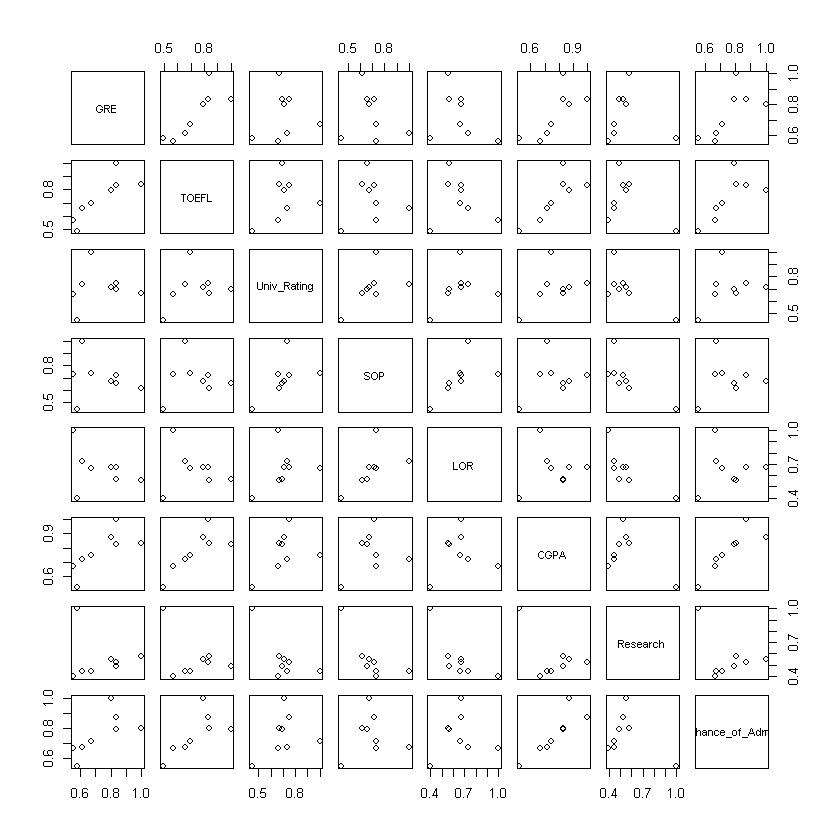

Start:  AIC=-2193.9
Chance_of_Admit ~ GRE + TOEFL + Univ_Rating + SOP + LOR + CGPA + 
    Research

              Df Sum of Sq    RSS     AIC
- SOP          1   0.00144 1.5962 -2195.5
- Univ_Rating  1   0.00584 1.6006 -2194.4
<none>                     1.5948 -2193.9
- TOEFL        1   0.02921 1.6240 -2188.6
- GRE          1   0.03435 1.6291 -2187.4
- Research     1   0.03862 1.6334 -2186.3
- LOR          1   0.06620 1.6609 -2179.6
- CGPA         1   0.38544 1.9802 -2109.3

Step:  AIC=-2195.54
Chance_of_Admit ~ GRE + TOEFL + Univ_Rating + LOR + CGPA + Research

              Df Sum of Sq    RSS     AIC
- Univ_Rating  1   0.00464 1.6008 -2196.4
<none>                     1.5962 -2195.5
+ SOP          1   0.00144 1.5948 -2193.9
- TOEFL        1   0.02806 1.6242 -2190.6
- GRE          1   0.03565 1.6318 -2188.7
- Research     1   0.03769 1.6339 -2188.2
- LOR          1   0.06983 1.6660 -2180.4
- CGPA         1   0.38660 1.9828 -2110.8

Step:  AIC=-2196.38
Chance_of_Admit ~ GRE + TOEFL + L


Call:
lm(formula = Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research, 
    data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.263542 -0.023297  0.009879  0.038078  0.159897 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.2984636  0.1172905 -11.070  < 2e-16 ***
GRE          0.0017820  0.0005955   2.992  0.00294 ** 
TOEFL        0.0030320  0.0010651   2.847  0.00465 ** 
LOR          0.0227762  0.0048039   4.741 2.97e-06 ***
CGPA         0.1210042  0.0117349  10.312  < 2e-16 ***
Research     0.0245769  0.0079203   3.103  0.00205 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06374 on 394 degrees of freedom
Multiple R-squared:  0.8027,	Adjusted R-squared:  0.8002 
F-statistic: 320.6 on 5 and 394 DF,  p-value: < 2.2e-16


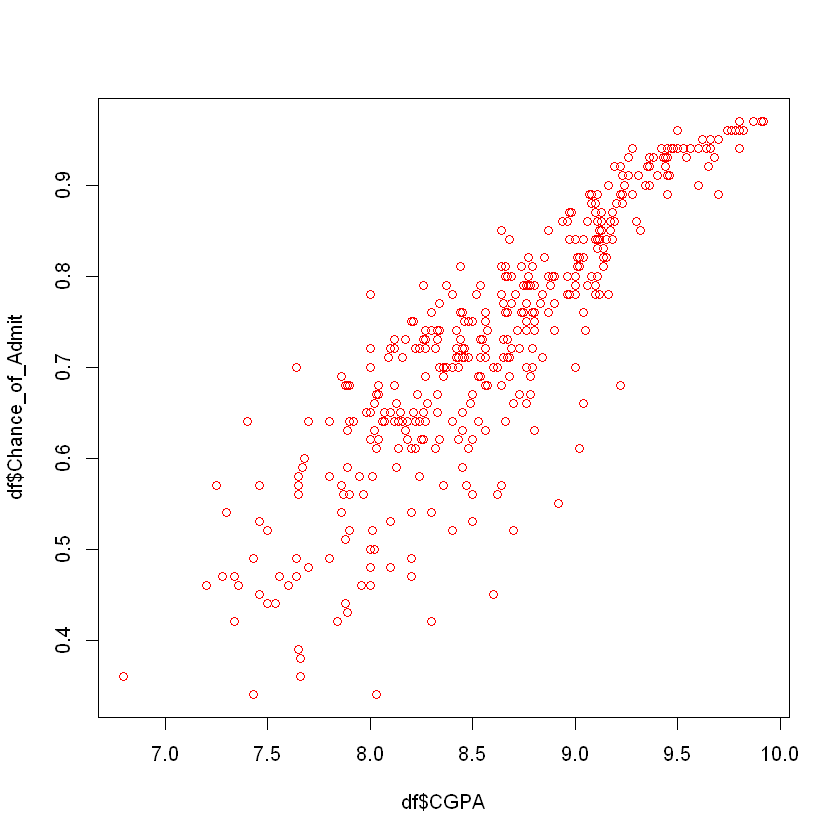

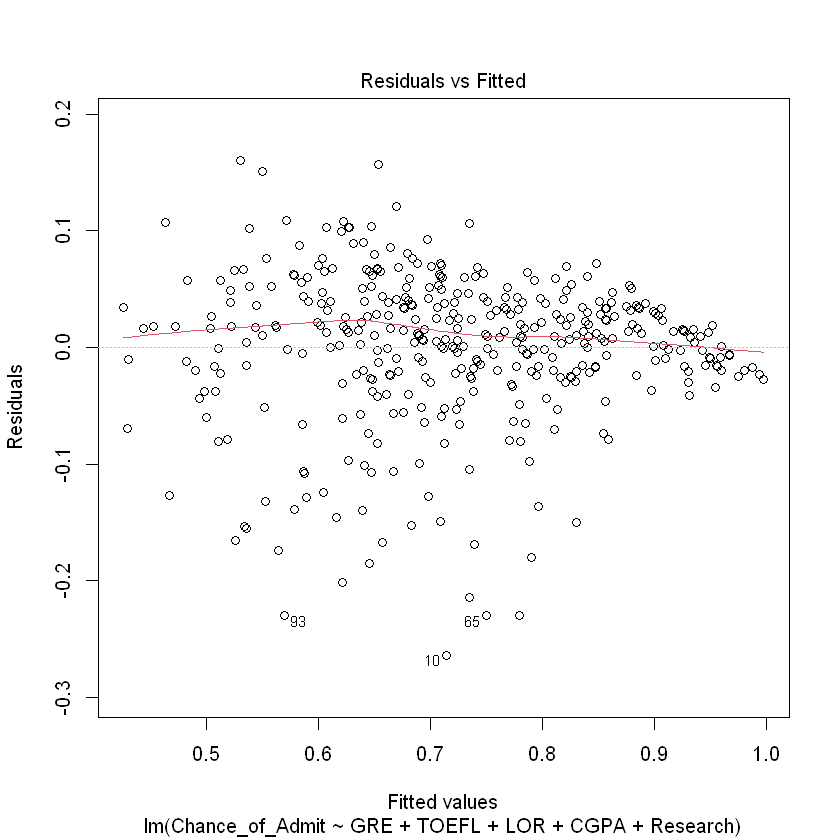

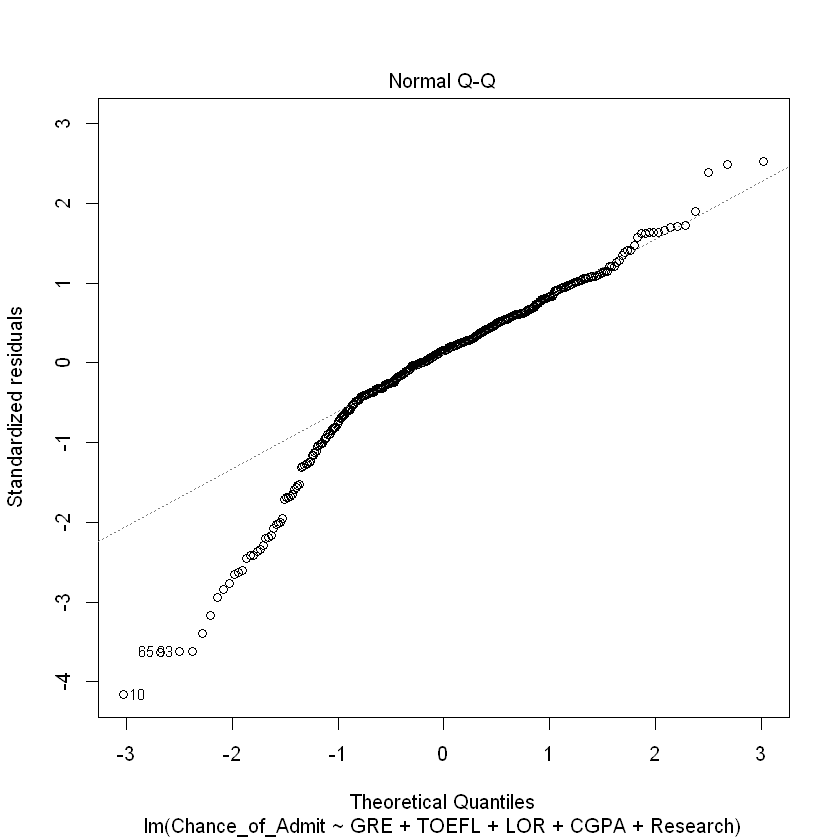

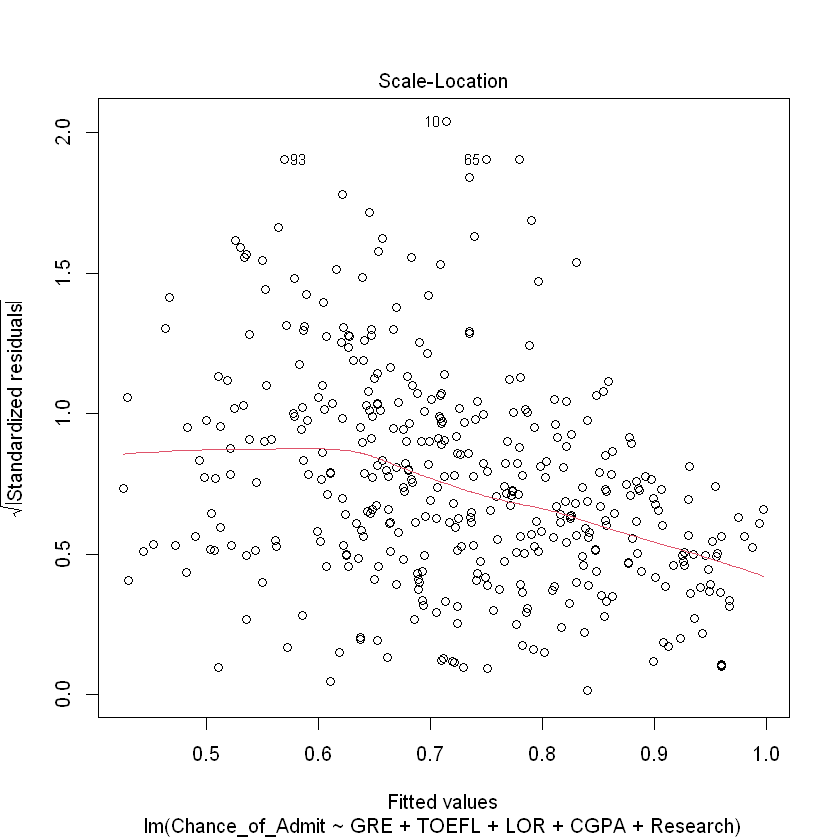


	Shapiro-Wilk normality test

data:  model.2$residuals
W = 0.92193, p-value = 1.443e-13


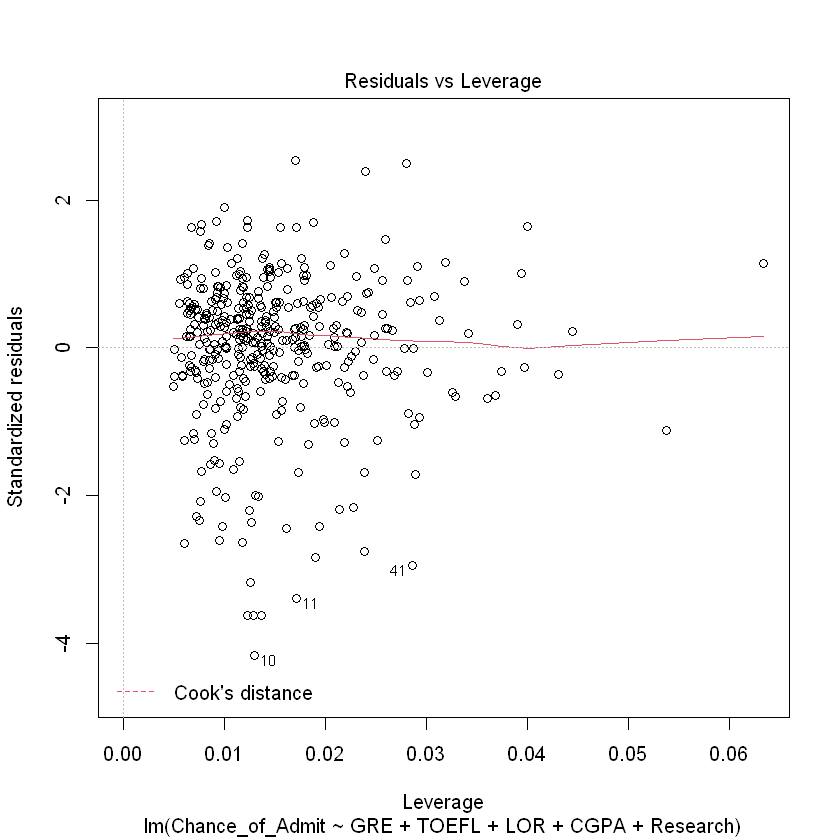

In [26]:
###################################################################################
#                      1. 통계분석 (사용 데이터 : Admission)                  
###################################################################################


#---------------------------------------------------------------------------------
# Q1) 종속변수인 chance_of_admit(입학 허가 확률)와 독립변수(GRE, TOEFL, 
#     Univ_Rating, SOP, LOR, CGPA)에 대해 피어슨 상관계수를 이용한 상관관계 분석을 
#     수행하고 그래프를 이용하여 분석결과를 설명하시오.
#---------------------------------------------------------------------------------

df = read.csv('./data//Admission.csv')

summary(df)
#df[, c("GRE", "TOEFL", "Univ_Rating", "SOP", "LOR", "CGPA")]

colSums(df)

# 데이터프레임 내의 상관계수 확인(모든 변수의 상관관계)
cor = cor(df)
cor
# CGPA와 chance_of_admit의 피어슨 상관계수값이 0.87로 가장 큰 양의 상관관계를 갖고 있음
# 어쨌든 모든 독립변수가 양의 상관관계를 약하든 강하든 갖고 있음

# 상관계수 행렬 확인
pairs(cor)

# 독립변수 1개와 종속변수 1개의 점 그래프 표현
plot(df$CGPA, df$Chance_of_Admit, col = "red")

#---------------------------------------------------------------------------------
# Q2) GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research가 Chance_of_Admit에 
#     영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.
#---------------------------------------------------------------------------------

model = lm(
    formula = Chance_of_Admit ~ GRE+TOEFL+Univ_Rating+ SOP+ LOR+ CGPA+ Research
    , data = df
)

model.pred = step(model, direction = "both")

# Step:  AIC=-2196.38
# Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research

#               Df Sum of Sq    RSS     AIC
# <none>                     1.6008 -2196.4
# + Univ_Rating  1   0.00464 1.5962 -2195.5
# + SOP          1   0.00024 1.6006 -2194.4
# - TOEFL        1   0.03292 1.6338 -2190.2
# - GRE          1   0.03638 1.6372 -2189.4
# - Research     1   0.03912 1.6400 -2188.7
# - LOR          1   0.09133 1.6922 -2176.2
# - CGPA         1   0.43201 2.0328 -2102.8

# AIC가 가장 낮은 값을 갖는 변수들을 선택하고, 다시 회귀분석 수행 후 결과 해석

model.2 = lm(
    formula = Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research
    , data = df
)

summary(model.2)

# Call:
# lm(formula = Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research, 
#     data = df)

# Residuals:
#       Min        1Q    Median        3Q       Max 
# -0.263542 -0.023297  0.009879  0.038078  0.159897 

# Coefficients:
#               Estimate Std. Error t value Pr(>|t|)    
# (Intercept) -1.2984636  0.1172905 -11.070  < 2e-16 ***
# GRE          0.0017820  0.0005955   2.992  0.00294 ** 
# TOEFL        0.0030320  0.0010651   2.847  0.00465 ** 
# LOR          0.0227762  0.0048039   4.741 2.97e-06 ***
# CGPA         0.1210042  0.0117349  10.312  < 2e-16 ***
# Research     0.0245769  0.0079203   3.103  0.00205 ** 
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Residual standard error: 0.06374 on 394 degrees of freedom
# Multiple R-squared:  0.8027,	Adjusted R-squared:  0.8002 
# F-statistic: 320.6 on 5 and 394 DF,  p-value: < 2.2e-16

# 회귀계수 유의성 확인 => 유의수준 0.05 하에서 회귀 계수별로 유의 확률을 확인했을때 0.05보다 작으므로 회귀 계수는 유의하다.
# 회귀모형 설명력 확인(결정계수) => 결정계수값은 0.80로, 1에 가까울수록 모형의 설명력이 좋다.
# 회귀모형 유의성 확인 => F 검정 통계량 기반으로 계산된 유의확률이 유의수준 0.05보다 작으므로, 통계적으로 유의하다고 볼 수 있다.

#---------------------------------------------------------------------------
# Q3) 단계 선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 
#     잔차분석을 수행하고 결과를 해석하시오. 
#---------------------------------------------------------------------------

# 잔차분석 => 잔차의 정규성, 독립성, 등분산성을 만족시켜야함
# 회귀 모델을 plot 함수에 넣어주면 그래프 4개를 표시해줌
# par(mfrow=c(2,2))
plot(model.2)

# Residuals vs Fitted => (모형 선형성) 잔차가 정규분포를 따른다는 정규성 가정 만족 확인, 기울기가 0인 직선 형태가 이상적, 완전히 직선 형태는 아니나 어느정도 만족함을 확인
# Normal Q-Q plot 확인 => (잔차 정규성) 표준화된 잔차의 확률도 확인, 점들은 기울기가 1인 직선 형태에 위치하는 것이 이상적, 일부 이탈이 있으나 어느정도 만족함을 확인
# Scale-Location => (잔차 등분산성) 기울기가 0인 직선 형태에 위치하는 것이 이상적
# Cook distance => 잔차는 왼쪽 가운데 몰려있어야 이상적

# 잔차의 정규성 검정은 샤피로 검정으로도 가능
shapiro.test(model.2$residuals)